<a href="https://colab.research.google.com/github/Ayush-kr-007/Deel-Learning/blob/main/Customer_Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df['Surname'].value_counts()

,count
Surname,
Smith,32
Scott,29
Martin,29
Walker,28
Brown,26
...,...
Hull,1
Sturdee,1
Flannagan,1


In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [ ]:
X = df.drop(columns=['Exited'])
y =df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation ='relu',input_dim=11))
model.add(Dense(11,activation ='relu'))
model.add(Dense(1,activation ='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history= model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5385 - loss: 0.6842 - val_accuracy: 0.8106 - val_loss: 0.4927
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8079 - loss: 0.4862 - val_accuracy: 0.8175 - val_loss: 0.4520
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8102 - loss: 0.4446 - val_accuracy: 0.8150 - val_loss: 0.4350
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8273 - loss: 0.4116 - val_accuracy: 0.8188 - val_loss: 0.4218
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8171 - loss: 0.4181 - val_accuracy: 0.8213 - val_loss: 0.4109
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8281 - loss: 0.4062 - val_accuracy: 0.8238 - val_loss: 0.4002
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8287 - loss: 0.4094 - val_accuracy: 0.8306 - val_loss: 0.3885
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8384 - loss: 0.3838 - val_accu

In [ ]:
model.layers[1].get_weights()

[array([[-0.4376401 ,  0.07164203, -0.17793791, -0.22309712, -0.09877911,
         -3.1456409 ,  0.5074101 ,  0.6169224 , -0.03968151, -0.10917982,
         -0.08147202],
        [-1.0944526 ,  0.36115584, -0.5099736 ,  0.6820237 , -0.40926006,
          0.57662946, -0.4280111 ,  0.39874557,  0.37204772,  0.18930563,
         -0.18200997],
        [-0.6548425 , -0.05529498, -0.35826093,  0.06281006,  0.5765257 ,
          0.09916531,  0.36899817,  0.04659273, -0.0907231 ,  0.604312  ,
          0.46422148],
        [-0.15829721,  0.23971562,  0.533713  ,  0.40164587,  0.12022225,
         -1.885489  , -0.36738104, -0.59702724, -0.26124734, -0.27482104,
          0.12608787],
        [-0.71013474,  0.38621345,  0.43332225, -0.23671542,  0.38508704,
          0.3290964 ,  0.39541215, -0.03788884, -0.03758831,  0.43951738,
          0.5994425 ],
        [ 0.95306045, -0.9118267 , -1.0222318 ,  0.8902699 , -3.2321587 ,
         -1.8222654 ,  0.07665332,  0.11226736, -0.25342804, -0.3330626

In [ ]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.02012295],
       [0.12788951],
       [0.08162637],
       ...,
       [0.00703419],
       [0.02901458],
       [0.49255145]], dtype=float32)

In [ ]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8695

In [ ]:
history.history

{'accuracy': [0.682812511920929,
  0.8090624809265137,
  0.8129687309265137,
  0.8176562786102295,
  0.8253124952316284,
  0.831250011920929,
  0.8370312452316284,
  0.8426562547683716,
  0.8460937738418579,
  0.8498437404632568,
  0.8535937666893005,
  0.8560937643051147,
  0.8564062714576721,
  0.8579687476158142,
  0.859375,
  0.8610937595367432,
  0.8610937595367432,
  0.8618749976158142,
  0.86328125,
  0.8642187714576721,
  0.8635937571525574,
  0.8650000095367432,
  0.864062488079071,
  0.8650000095367432,
  0.8678125143051147,
  0.8653125166893005,
  0.8642187714576721,
  0.8657812476158142,
  0.8651562333106995,
  0.8646875023841858,
  0.8645312786102295,
  0.8670312762260437,
  0.8662499785423279,
  0.8665624856948853,
  0.8653125166893005,
  0.8650000095367432,
  0.8657812476158142,
  0.866406261920929,
  0.8667187690734863,
  0.8654687404632568,
  0.8654687404632568,
  0.8656250238418579,
  0.866406261920929,
  0.8659374713897705,
  0.8653125166893005,
  0.8675000071525574,

In [ ]:
history.history

{'accuracy': [0.682812511920929,
  0.8090624809265137,
  0.8129687309265137,
  0.8176562786102295,
  0.8253124952316284,
  0.831250011920929,
  0.8370312452316284,
  0.8426562547683716,
  0.8460937738418579,
  0.8498437404632568,
  0.8535937666893005,
  0.8560937643051147,
  0.8564062714576721,
  0.8579687476158142,
  0.859375,
  0.8610937595367432,
  0.8610937595367432,
  0.8618749976158142,
  0.86328125,
  0.8642187714576721,
  0.8635937571525574,
  0.8650000095367432,
  0.864062488079071,
  0.8650000095367432,
  0.8678125143051147,
  0.8653125166893005,
  0.8642187714576721,
  0.8657812476158142,
  0.8651562333106995,
  0.8646875023841858,
  0.8645312786102295,
  0.8670312762260437,
  0.8662499785423279,
  0.8665624856948853,
  0.8653125166893005,
  0.8650000095367432,
  0.8657812476158142,
  0.866406261920929,
  0.8667187690734863,
  0.8654687404632568,
  0.8654687404632568,
  0.8656250238418579,
  0.866406261920929,
  0.8659374713897705,
  0.8653125166893005,
  0.8675000071525574,

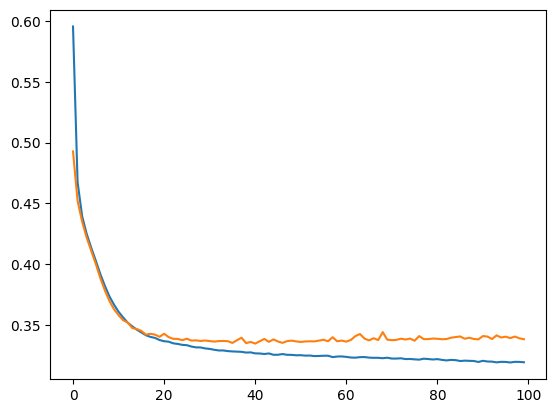

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

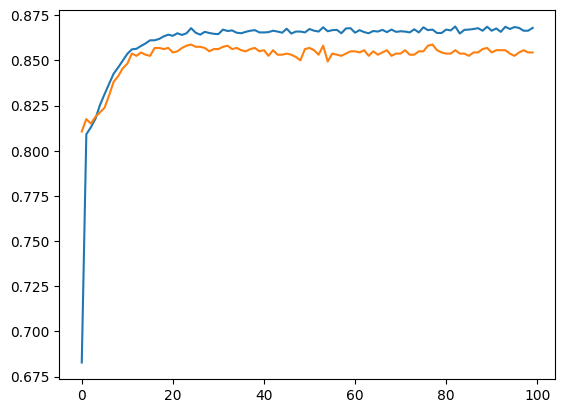

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])